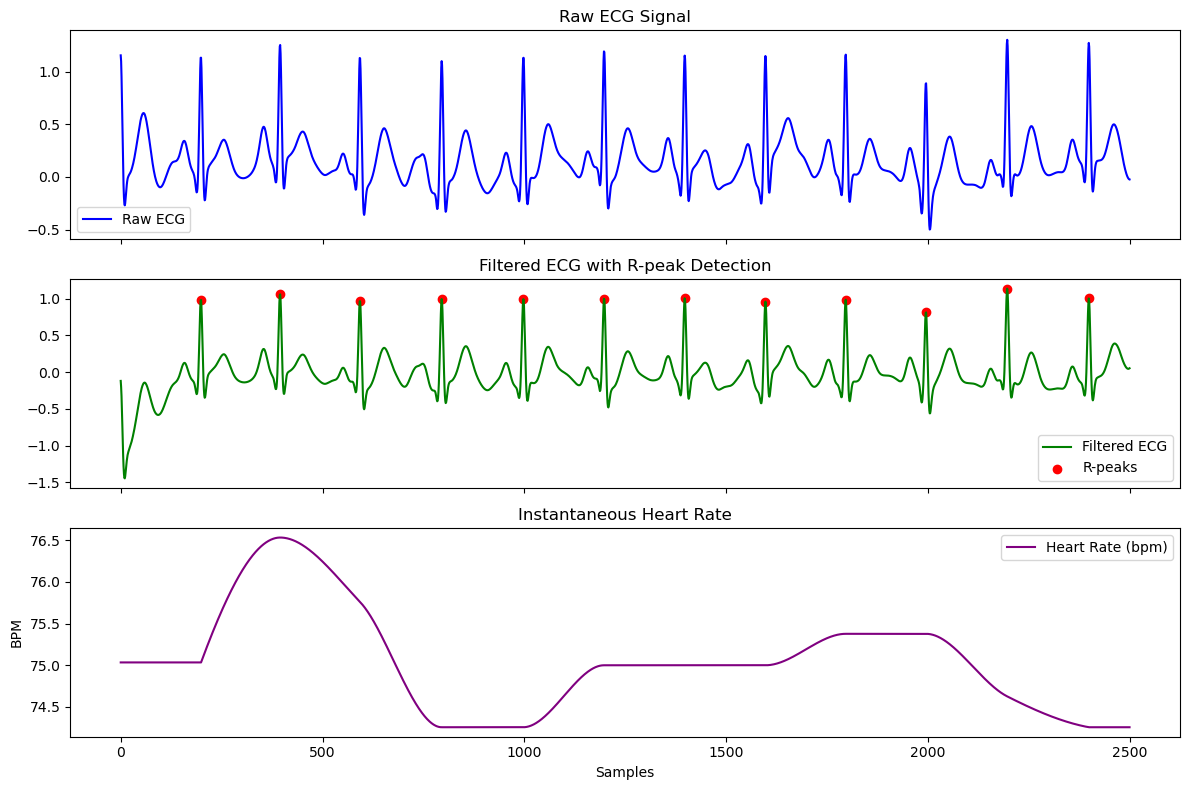


R-peak Detection Comparison:
Raw signal detected 12 R-peaks
Filtered signal detected 12 R-peaks
Average heart rate (raw): 75.0 bpm
Average heart rate (filtered): 75.0 bpm


In [15]:
import neurokit2 as nk
import matplotlib.pyplot as plt
import numpy as np

ecg = nk.ecg_simulate(duration=10, sampling_rate=250, heart_rate=75, noise=0.2)

filtered_ecg = nk.signal_filter(ecg, sampling_rate=250, lowcut=0.5, highcut=40, method="butterworth")

rpeaks = nk.ecg_findpeaks(filtered_ecg, sampling_rate=250, method="neurokit")

heart_rate = nk.ecg_rate(rpeaks, sampling_rate=250, desired_length=len(filtered_ecg))

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

ax1.plot(ecg, color='blue', label='Raw ECG')
ax1.set_title('Raw ECG Signal')
ax1.legend()

ax2.plot(filtered_ecg, color='green', label='Filtered ECG')
ax2.scatter(rpeaks["ECG_R_Peaks"], filtered_ecg[rpeaks["ECG_R_Peaks"]], color='red', label='R-peaks')
ax2.set_title('Filtered ECG with R-peak Detection')
ax2.legend()

ax3.plot(heart_rate, color='purple', label='Heart Rate (bpm)')
ax3.set_title('Instantaneous Heart Rate')
ax3.set_xlabel('Samples')
ax3.set_ylabel('BPM')
ax3.legend()

plt.tight_layout()
plt.show()


print("\nR-peak Detection Comparison:")
print(f"Raw signal detected {len(rpeaks_raw['ECG_R_Peaks'])} R-peaks")
print(f"Filtered signal detected {len(rpeaks_filtered['ECG_R_Peaks'])} R-peaks")
print(f"Average heart rate (raw): {np.nanmean(hr_raw):.1f} bpm")
print(f"Average heart rate (filtered): {np.nanmean(hr_filtered):.1f} bpm")